Recall! You must copy this notebook to your own Drive before using!

# **Lab 10: Classification Introduction**


# How Classification Comes to Be...

- First, let's import the "credit" dataset by installing the ISLP module and learning how to load directly from our package...
  - [Link to package](https://github.com/intro-stat-learning/ISLP): Always research the packages you install!
  - [Documentation](https://intro-stat-learning.github.io/ISLP/datasets/Default.html) on how to use the ISLP package!

### Data Dictionary:

`default`: A factor with levels ‘No’ and ‘Yes’ indicating whether the customer defaulted on their debt

`student`: A factor with levels ‘No’ and ‘Yes’ indicating whether the customer is a student

`balance`: The average balance that the customer has remaining on their credit card after making their monthly payment

`income`: Income of customer

# Question 1

- pip install the ISLP package, restart your runtime, import the ISLP module, and load the "default" dataset as `default`.

In [ ]:
# run this code then restart your runtime above!
! pip install ISLP

In [1]:
from ISLP import load_data
default = load_data('Default')
default.head()

,default,student,balance,income
0,No,No,729.526495,44361.625074
1,No,Yes,817.180407,12106.134700
2,No,No,1073.549164,31767.138947
3,No,No,529.250605,35704.493935
4,No,No,785.655883,38463.495879


# Question 2: Exploratory Data Analysis

- Plot a bar chart with the default data. The plot should be a histogram representing the count of defaults in the dataset on the x-axis

Here you are encouraged to use a new plotting library (it turns out there are many).

```python
import seaborn as sns

```

You are also allowed to use altair if you want.


*hint*: emulate [this](https://python-graph-gallery.com/20-basic-histogram-seaborn/) documentation with the `default` data in its stead, and the `"default"` column as the x variable.

<Axes: xlabel='default', ylabel='Count'>

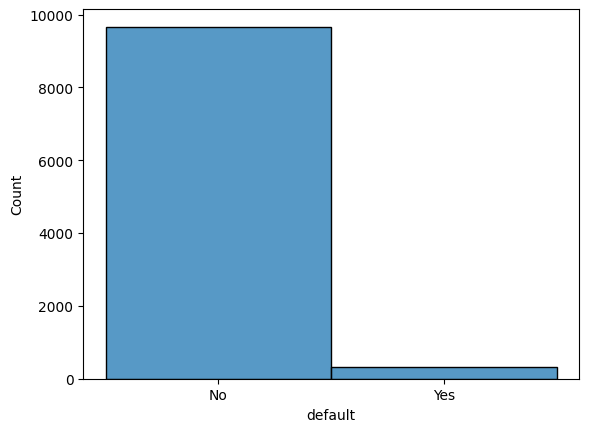

In [6]:
import seaborn as sns

sns.histplot(data=default,
             x="default")

# Question 3: Feature engineering

- clean the default data of such that both "default" and "student" are integers. "No" strings. should `map` to 0 and "Yes" strings should map to 1.

In [15]:
default['student'] = default['student'].map({"No": 0, "Yes": 1}).astype(int)
default['default'] = default['default'].map({"No": 0, "Yes": 1}).astype(int)

In [16]:
default.head()

,default,student,balance,income
0,0,0,729.526495,44361.625074
1,0,1,817.180407,12106.134700
2,0,0,1073.549164,31767.138947
3,0,0,529.250605,35704.493935
4,0,0,785.655883,38463.495879


# Question 4: Logistic Regression

- import stats models and the "train_test_split" function from `sklearn`
- Assign `student` as the independent variable,  `default`  as the dependent variable.
- split the training and test data into 90% training, 10% test datasets. Don't forget to shuffle and set a random_seed number.
- add a constant to the X training set.
- Run and fit a `Logit` model on the training X and y data.
- print out the summary data of the fit.

In [23]:
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

X = default[['student']]
y = default['default']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=4189, shuffle=True)
X_train = sm.add_constant(X_train)
logit_fit = sm.Logit(y_train, X_train).fit()
print(logit_fit.summary())

Optimization terminated successfully.
         Current function value: 0.141963
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                default   No. Observations:                 7500
Model:                          Logit   Df Residuals:                     7498
Method:                           MLE   Df Model:                            1
Date:                Mon, 25 Sep 2023   Pseudo R-squ.:                0.004017
Time:                        20:32:26   Log-Likelihood:                -1064.7
converged:                       True   LL-Null:                       -1069.0
Covariance Type:            nonrobust   LLR p-value:                  0.003382
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.5355      0.083    -42.684      0.000      -3.698      -3.373
student        0.4024      0.

# Question 5: Logistic Coefficient Interpretation

a). Is being a student statistically significant at the 5% level? Why or why not?

b). Based on what we talked about in class, what can we say about the student coefficient? What does it mean in percentage terms? (**Major Hint**: Be very careful! Remember, we can't just read the coefficients outright!)

In [ ]:
# a). Yes. .003 < .05 therefore we reject the null hypothesis of beta = 0 in favor of the alternative.


In [28]:
from math import exp

print(exp(0.4024))
# b). First we must exponentiate our cofficients. After doing so:
# Based on our data, since student is greater than 1, being a student is
# associated with a 49.5% _increased_ odds of compared to others, all else
# being equal.

1.4954093768099659
